In [ ]:
# In this project we are going to try to predict the price of a car, according to specific features
# For each car we have information about the technical aspects of the vehicle such as,weight ,
# the miles per gallon,acceleration, etc. You can read more about the data set here 
# https://archive.ics.uci.edu/ml/datasets/automobile
# and can download it directly from 
#  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [38]:
# Importing our dataset
dataset = pd.read_excel('CARS.xlsx')

In [39]:
# Exploring our dataset
dataset.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [40]:
# The dataset has no headers. From the link with the details, we can place the headers at each column.
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
dataset = pd.read_excel('C:\ΑΠΟΣΤΟΛΗΣ\ΑΠΟΣΤΟΛΗΣ\BET\CARS.xlsx', names=cols)

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    204 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         204 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression-rate     204 non-null float64
horsepower           204 non-nul

In [42]:
# We can detect already, that the price column, is referred as an object, which means that something
# is wrong. We expected a float or an integer type
dataset['price'].value_counts()

?        4
7775     2
8845     2
13499    2
7609     2
5572     2
8495     2
6229     2
7898     2
6692     2
18150    2
7957     2
9279     2
8921     2
7295     2
16500    2
16695    1
9298     1
6479     1
6989     1
13645    1
17199    1
7499     1
12440    1
28176    1
11549    1
32250    1
11845    1
7799     1
37028    1
        ..
9095     1
15750    1
9960     1
8358     1
7299     1
5118     1
13845    1
6295     1
14489    1
15040    1
6575     1
11199    1
15998    1
18620    1
6529     1
15985    1
12764    1
7349     1
17075    1
11694    1
16515    1
18420    1
18344    1
9895     1
7053     1
12964    1
16430    1
7126     1
36000    1
40960    1
Name: price, Length: 186, dtype: int64

In [50]:
# We detected four cells with a price of "?". So, let's replace it using the np.nan 
dataset['price'] = dataset['price'].replace("?" , np.nan)

In [51]:
# Verification
dataset['price'].value_counts()

16500.0    2
6229.0     2
9279.0     2
5572.0     2
7775.0     2
8845.0     2
8495.0     2
7295.0     2
7609.0     2
7957.0     2
7898.0     2
13499.0    2
18150.0    2
6692.0     2
8921.0     2
9538.0     1
16630.0    1
7689.0     1
7975.0     1
6575.0     1
22018.0    1
5389.0     1
7349.0     1
13415.0    1
9549.0     1
21485.0    1
24565.0    1
8013.0     1
34028.0    1
8058.0     1
          ..
28176.0    1
11248.0    1
18344.0    1
6488.0     1
13200.0    1
8358.0     1
12290.0    1
16695.0    1
17199.0    1
18420.0    1
11199.0    1
16503.0    1
9989.0     1
12170.0    1
6855.0     1
6785.0     1
14399.0    1
7395.0     1
22625.0    1
7053.0     1
15998.0    1
12940.0    1
7099.0     1
6338.0     1
9295.0     1
15580.0    1
6377.0     1
30760.0    1
16925.0    1
18920.0    1
Name: price, Length: 185, dtype: int64

In [52]:
#Dropping the nan values, if any
dataset.dropna(subset = ['price'] , inplace = True)

In [53]:
# From the non numeric columns, I choose to use for my model, the fuel-type, the num-of-doors,
# and the num of cylinders, which correspond to the  3,5,15 column index.So, all my features are:
X = dataset.iloc[:, [3,5,9,10,11,12,13,15,16,20,23,24]].values

In [54]:
#    ENCODING CATEGORICAL DATA
# Using LabelEncoder, OneHotEncoder, we will make these columns suitable for our regressors
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[: ,0 ])
onehotecoder = OneHotEncoder(categorical_features=[0])
X[:, 1] = labelencoder.fit_transform(X[: ,1 ])
onehotecoder = OneHotEncoder(categorical_features=[1])
X[:, 7] = labelencoder.fit_transform(X[: ,7 ])
onehotecoder = OneHotEncoder(categorical_features=[7])
X = onehotecoder.fit_transform(X).toarray()


In [55]:
# My target variable
y = dataset.iloc[: , 25:26].values

In [56]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [57]:
# Importing the Regressors
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()

from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(random_state = 42 )

from sklearn.svm import SVR
regressor3 = SVR()

from sklearn.tree import DecisionTreeRegressor
regressor4 = DecisionTreeRegressor(random_state = 42)


In [58]:
# Next, we will fit each regressor to our test set. After that we will use the avg rmse
# as a metric, for each regressor accuracy
results = []
regressors = [regressor1, regressor2, regressor3, regressor4]
for regressor in regressors:
    regressor.fit(X_train, y_train)
    from sklearn.model_selection import cross_val_score, KFold
    from sklearn   import metrics
    kf = KFold(5, shuffle=True, random_state=1)
    mses = cross_val_score(estimator = regressor, X = X_train, y = np.ravel(y_train, order = 'C'), scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    results.append(avg_rmse)    
print(results)

C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[3700.3534873406657, 2466.3786638723568, 7989.5822139999973, 2999.7803139829225]


C:\Users\tolaros\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\tolaros\Anaconda3\lib\site-packages\ipy

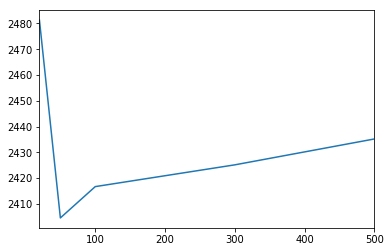

In [30]:
# The lowest rmse comes with the random forest regressor. I am still a little bit curious whether we can improve
# our regressor by tuning hyperparams
results2 = []
n_estimators = [20,50,100,300,500]
for trees in n_estimators:
    regressor = RandomForestRegressor(trees , random_state = 42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    from sklearn.model_selection import cross_val_score, KFold
    from sklearn   import metrics
    kf = KFold(5, shuffle=True, random_state=1)
    mses = cross_val_score(estimator = regressor, X = X_train, y = np.ravel(y_train, order = 'C'), scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    results2.append(avg_rmse)
pd.Series(results2, n_estimators).plot()

In [24]:
print(results2)

[2481.2322874378915, 2404.5468069826675, 2416.6913220046326, 2425.13161063395, 2435.1673091541902]


C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\tolaros\Anaconda3\lib\site-packages\ipy

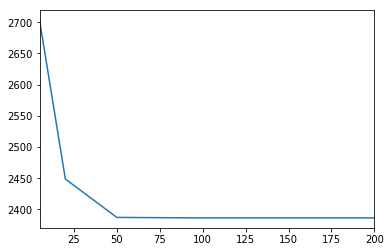

In [31]:
# The avg rmse error minimizes for n_estimators = 50. Next, using this price, we will see
# if the error decreases even more, by optimizing the max leaf nodes 
results3 = []
max_leaf_nodes = [5,20,50,100,200]
for leaf in max_leaf_nodes:
    regressor = RandomForestRegressor(n_estimators = 50 , random_state = 42, max_leaf_nodes = leaf)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    from sklearn.model_selection import cross_val_score, KFold
    from sklearn   import metrics
    kf = KFold(5, shuffle=True, random_state=1)
    mses = cross_val_score(estimator = regressor, X = X_train, y = np.ravel(y_train, order = 'C'), scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    results3.append(avg_rmse)
pd.Series(results3, max_leaf_nodes).plot() 


In [26]:
print(results3)

[2703.1065621104945, 2448.6743972609429, 2387.0908948745796, 2386.2941621891773, 2386.2941621891773]


In [ ]:
# The error minimizes at a price of 2386.3  , where max leaf nodes = 50

AxesSubplot(0.125,0.125;0.775x0.755)


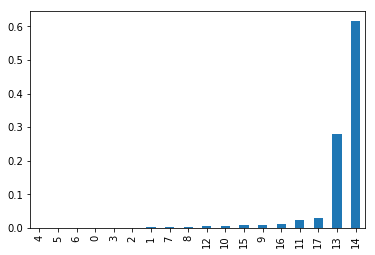

In [32]:
# The avg_rmse  minimizes for max_leaf_nodes = 50 , at a price of 2386.29 
# So our best regressor is tuned, for the above hyperparams
# Another option that we have is, the feature importance attribute of this regressor.

list(regressor.feature_importances_)
feature_importances = pd.Series(regressor.feature_importances_ )
feature_importances.sort_values()
print(feature_importances.sort_values().plot(kind = 'bar'))


In [35]:
# features number 13 and 14 outstand from the others.These are curb-weight and engine size.
# Would it be possible that our rmse error decreases  more, if we only used these two? Let's find out
X = dataset[['curb-weight' , 'engine-size']].values
y = dataset.iloc[: , 25:26].values
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 42, n_estimators = 50, max_leaf_nodes = 50 )
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
from sklearn.model_selection import cross_val_score, KFold
from sklearn   import metrics
kf = KFold(5, shuffle=True, random_state=1)
mses = cross_val_score(estimator = regressor, X = X_train, y = np.ravel(y_train, order = 'C'), scoring="neg_mean_squared_error", cv=kf)
rmses = np.sqrt(np.absolute(mses))
newavg_rmse = np.mean(rmses)
print(newavg_rmse)

C:\Users\tolaros\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


2387.09089487


In [ ]:
# Almost identical avg rmse. 
# To conclude, our best regressor is a RandomForestRegressor eith the following hyperparameters
# random_state = 42
# n_estimators = 50
# max_leaf_nodes = 50
